In [3]:
import sys
sys.path.append('../scripts/')

In [27]:
import car_counting_functions as ccf
import scrape_spokane_functions as ssf
import pandas as pd
import urllib
import numpy as np
import cv2


In [9]:
import imageio

url = "https://cp.spokanecounty.org/parks/parkcams/IllerCreek/IllerCreek-1.jpg"

# image is going to be type <class 'imageio.core.util.Image'>
# that's just an extension of np.ndarray with a meta attribute

image = imageio.imread(url)
image = cv2.imdecode(image, -1)

In [24]:
import glob
import os

list_of_files = glob.glob('../data/raw/AntoineW/*') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)

../data/raw/AntoineW/05-06-2020-14-10.jpeg


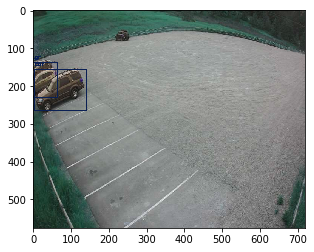

In [25]:
ccf.show_image_detection(latest_file)

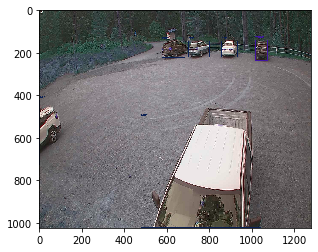

In [36]:
base_path = "../data/raw/"
cams = ["AntoineW", "Glenrose", "IllerCreek", "StevensCreek"]
cam_paths = [base_path + cam + "/*" for cam in cams]

def show_latest_image(cam_path):
    list_of_files = glob.glob(cam_path) # * means all if need specific format then *.csv
    latest_file = max(list_of_files, key=os.path.getctime)
    image = ccf.show_image_detection(latest_file)
    return image

last_Antoine = show_latest_image(cam_paths[3])

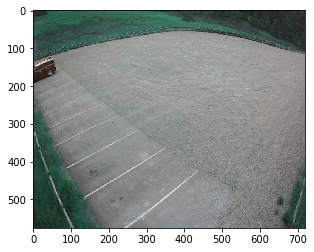

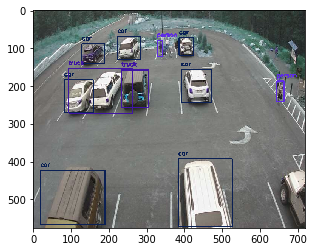

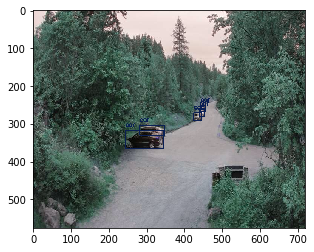

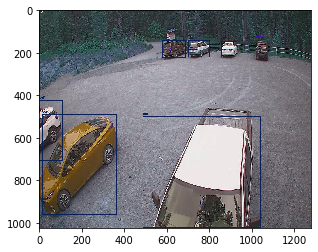

In [40]:
# cam picutres"
base_path = "/Users/cmfmiller/Dropbox/Insight/visionary/data/raw/"
cams = ["AntoineW", "Glenrose", "IllerCreek", "StevensCreek"]
cam_paths = [base_path + cam + "/*" for cam in cams]

def latest_image(cam_path):
   list_of_files = glob.glob(cam_path) # * means all if need specific format then *.csv
   latest_file = max(list_of_files, key=os.path.getctime)
   return latest_file


most_recent_files = [latest_image(path) for path in cam_paths]

most_recent_image = [ccf.show_image_detection(path) for path in most_recent_files]

most_recent_count = [ccf.car_count(path) for path in most_recent_files]

In [41]:
max_occupancy = [40, 20, 20, 20]
most_recent_count, max_occupancy

([0, 9, 5, 7], [40, 20, 20, 20])

In [43]:
current_vacancy = [occ - count for occ, count in zip(max_occupancy, most_recent_count)]
current_vacancy

[40, 11, 15, 13]

In [45]:
by_lot = [[occ, vac] for occ, vac in zip(most_recent_count, current_vacancy)]

In [46]:
by_lot

[[0, 40], [9, 11], [5, 15], [7, 13]]

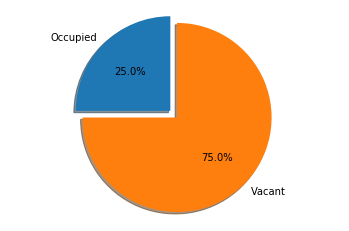

In [51]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["Occupied", "Vacant"]
sizes = by_lot[2]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.pyplot.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.pyplot.show()

In [30]:
import matplotlib as plt

In [32]:
cam_paths

['../data/raw/AntoineW/*',
 '../data/raw/Glenrose/*',
 '../data/raw/IllerCreek/*',
 '../data/raw/StevensCreek/*']

In [31]:
plt.imshow(last_Antoine)

AttributeError: module 'matplotlib' has no attribute 'imshow'

In [22]:
ls

01_first_logical_notebook.ipynb   archive/
01_second_logical_notebook.ipynb  car_count_validation.ipynb
Car_counting_functions.ipynb      figures/
Streamlit testing.ipynb           prototype_notbook.ipynb


In [20]:
image[image == 0] = 1

In [ ]:
cap = cv2.VideoCapture("https://cp.spokanecounty.org/parks/parkcams/IllerCreek/IllerCreek-1.jpg")

In [ ]:
ccf.show_image_detection(cap)

In [11]:
img_array = np.array(bytearray(img), dtype=np.uint8)
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

TypeError: 'JpegImageFile' object is not iterable